<a href="https://colab.research.google.com/github/pradeep121212/Attendence_Marker/blob/master/Attendence_Marker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     |████████████████████████████████| 100.2MB 72kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=f3891869d3b18760244861e975d61d0ee398d469152f95cbbe003857ceada5c7
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


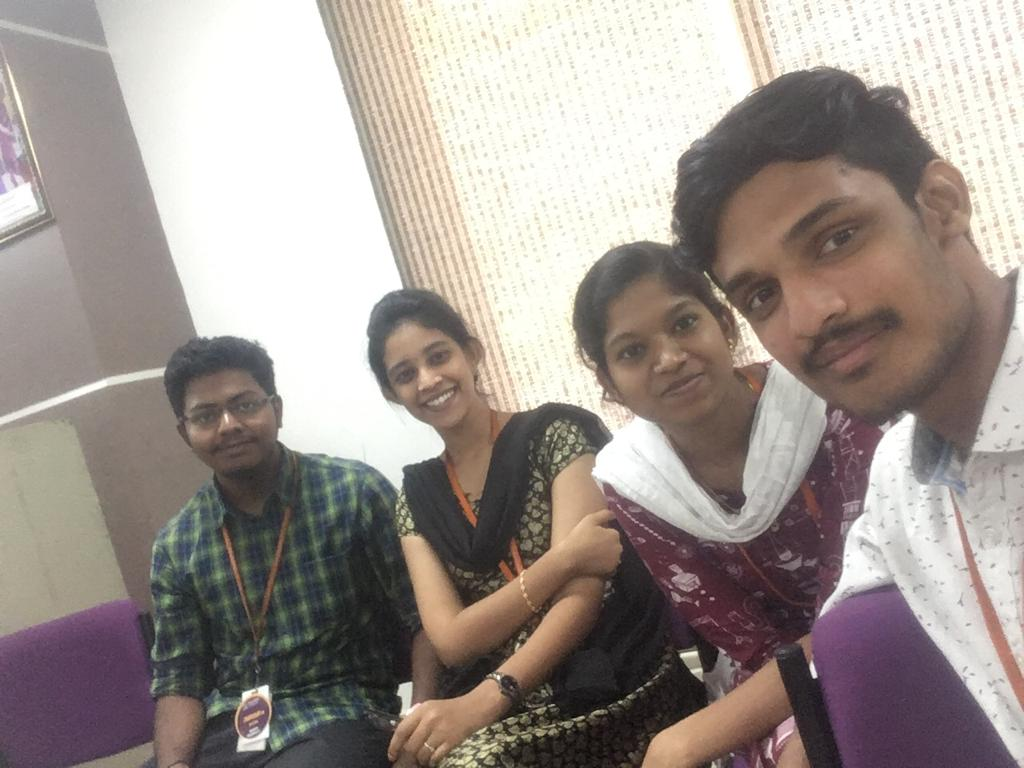

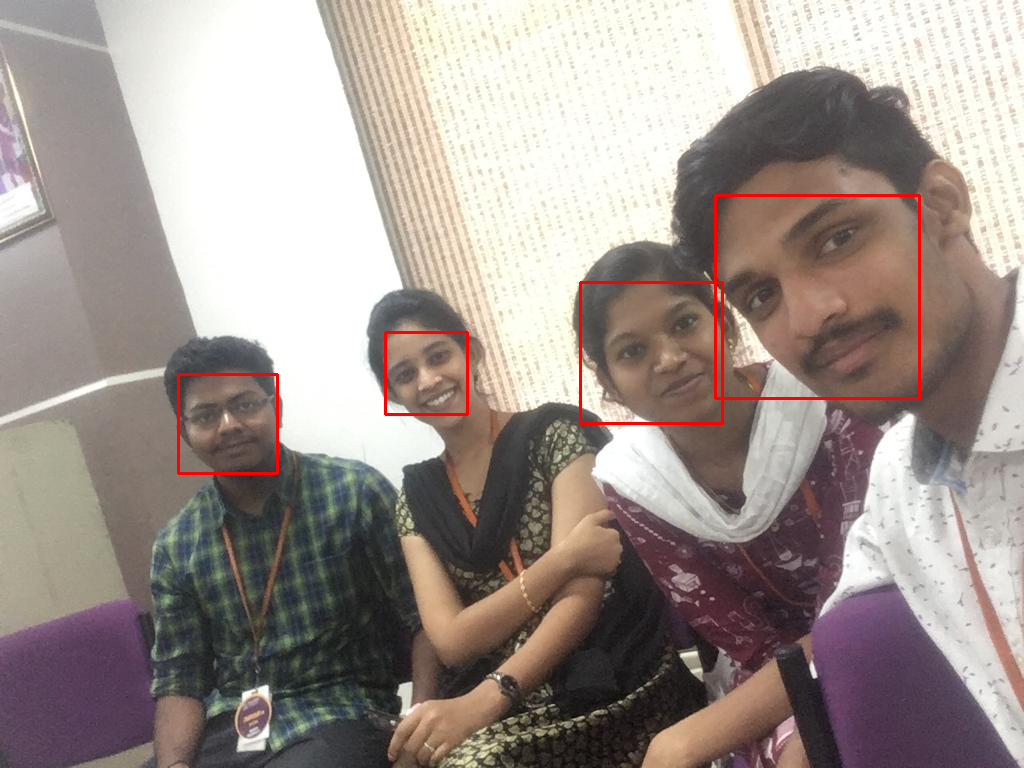

/content/gdrive/My Drive/Attendance/student_images/18225760007_7.jpg is absent
/content/gdrive/My Drive/Attendance/student_images/18225760006_6.jpg is absent
/content/gdrive/My Drive/Attendance/student_images/18225760008_8.jpg is absent
/content/gdrive/My Drive/Attendance/student_images/18225760013_12.jpg is absent
/content/gdrive/My Drive/Attendance/student_images/18225760010_10.jpg is absent
/content/gdrive/My Drive/Attendance/student_images/18225760011_11.jpg is absent
/content/gdrive/My Drive/Attendance/student_images/18225760009_9.jpg is absent
/content/gdrive/My Drive/Attendance/student_images/18225760005_5.jpg is Present
/content/gdrive/My Drive/Attendance/student_images/18225760001_1.jpg is Present
/content/gdrive/My Drive/Attendance/student_images/18225760003_3.jpg is Present
/content/gdrive/My Drive/Attendance/student_images/18225760002_2.jpg is absent
/content/gdrive/My Drive/Attendance/student_images/18225760004_4.jpg is Present
Total Number of Students Present =  4
Total N

In [1]:
!pip install face-recognition
!pip install pydrive

import cv2
import dlib
from google.colab.patches import cv2_imshow

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive

import os 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

drive.mount('/content/gdrive')


image = cv2.imread('/content/gdrive/My Drive/Attendance/img1.jpg')
cv2_imshow(image)
image1=image

cnnFaceDetector = dlib.cnn_face_detection_model_v1("/content/gdrive/My Drive/Attendance/mmod_human_face_detector.dat")

faces_cnn = cnnFaceDetector(image, 1)
f1=[]

for face in faces_cnn:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y
    f1.append(image[y:y+h,x:x+w,:])
    cv2.rectangle(image1, (x,y), (x+w,y+h), (0,0,255), 2)

cv2_imshow(image1)


import face_recognition
loc=face_recognition.face_locations(image,number_of_times_to_upsample=1,model="cnn")
known_image = face_recognition.load_image_file("/content/gdrive/My Drive/Attendance/img1.jpg",)
face_encoding = face_recognition.face_encodings(known_image,known_face_locations=loc)
import os
import glob
import re
pre=0;
abse=0;
c1=[]
roll_num=[]
for filename in glob.glob("/content/gdrive/My Drive/Attendance/student_images/*.jpg"):

    check_image = face_recognition.load_image_file(filename)
    check_image=cv2.resize(check_image,(0,0), fx=0.2, fy=0.2)

    loc1=face_recognition.face_locations(check_image,number_of_times_to_upsample=1,model="cnn")
    face_encoding_check = face_recognition.face_encodings(check_image,known_face_locations=loc1)

    results1=[]
    for i in range(len(face_encoding)):
        cnt=0
        results = face_recognition.compare_faces([face_encoding[i]], face_encoding_check[0],tolerance=0.5)
        results1.append(results[0])

        if results[0] == True:
            cnt=cnt+1
            top, right, bottom, left = loc[i]
            match_image = image[top:bottom, left:right]

                
    c1.append(results1.count(True))
    if results1.count(True)>0:
        print(filename,"is Present")
        pre=pre+1
    else:
        print(filename, "is absent") 
        abse=abse+1


print('Total Number of Students Present = ',pre)
print('Total Number of Students Absent = ',abse)

    
import pandas as pd
import numpy as np
import datetime

sheet=pd.read_csv('/content/gdrive/My Drive/Attendance/attendance_batch5.csv')
date=datetime.datetime.now()
dat=date.strftime("%d-%m-%Y") 

sheet[dat]=c1

sheet.to_csv('/content/gdrive/My Drive/Attendance/attendance_batch5.csv',index=None)


drive = GoogleDrive(gauth)

path = r"/content/gdrive/My Drive/Attendance/" 
f = drive.CreateFile({'title': '{}_{}_attendance_batch5_.csv'.format(date.strftime("%H:%M:%S"),date.strftime("%d-%m-%Y"))}) 
    
f.SetContentFile(os.path.join(path, 'attendance_batch5.csv')) 
f.Upload() 
f = None



    
